
# Лабораторна робота №3 

**Мета:** удосконалити інтелектуального агента з попередньої лабораторної роботи, щоб агент створював та використовував власну базу знань для орієнтування та побудови маршруту, рухаючись по графу-дорозі.  

**Завдання:**
1. Отримати навички роботи з базами знань. 
2. Удосконалити агента-автомобіля з попередньої лабораторної роботи.


## 1. Імпорт необхідних бібліотек

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation
from IPython.display import Image
from lab1 import RoadGraph


## 2. Клас KnowledgeBase — база знань агента

In [2]:
class KnowledgeBase:
    def __init__(self):
        self.world = {}

    def tell(self, node, neighbors):
        if node not in self.world:
            self.world[node] = list(neighbors)

    def ask(self, node):
        return self.world.get(node, [])


## 3. Клас CarAgent 
Модель інтелектуального агента-автомобіля, який рухається по дорожній мережі.
Він приймає рішення на основі евристики Манхеттенської відстані, поступово наближаючись до цілі.
Та використовує базу знань.

In [3]:

class CarAgent:
    def __init__(self, graph: nx.Graph, start: int, finish: int):
        self.graph = graph
        self.start = start
        self.finish = finish
        self.current_node = start
        self.visited = {start}
        self.history = [start]
        self.stack = [start]
        self.kb = KnowledgeBase()
        self.positions = nx.get_node_attributes(graph, 'pos')
        self.kb.tell(start, self.perceive())

    def perceive(self):
        return list(self.graph.neighbors(self.current_node))

    def manhattan_distance(self, node1, node2):
        x1, y1 = self.positions[node1]
        x2, y2 = self.positions[node2]
        return abs(x1 - x2) + abs(y1 - y2)

    def decide_next(self):
        known_neighbors = self.kb.ask(self.current_node)
        if not known_neighbors:
            return None

        unvisited = [n for n in known_neighbors if n not in self.visited]

        if unvisited:
            return min(unvisited, key=lambda n: self.manhattan_distance(n, self.finish))
        else:
            return None  # тупик

    def move(self):
        next_node = self.decide_next()

        if next_node is not None:
            self.current_node = next_node
            self.visited.add(next_node)
            self.history.append(next_node)
            self.stack.append(next_node)

            self.kb.tell(next_node, self.perceive())

        else:
            if len(self.stack) > 1:
                self.stack.pop()
                self.current_node = self.stack[-1]
                self.history.append(self.current_node)

    def get_colors(self):
        colors = []
        for node in self.graph.nodes():
            if node == self.start:
                colors.append("green")
            elif node == self.current_node:
                colors.append("blue")
            elif node == self.finish:
                colors.append("gold")
            elif node in self.visited:
                colors.append("lightgrey")
            else:
                colors.append("white")
        return colors


## 4. Функції для візуалізації роботи агента

In [4]:

def draw_graph(agent, ax):
    nx.draw(
        agent.graph, agent.positions, node_color=agent.get_colors(),
        with_labels=False, node_size=500, edgecolors="black",
        linewidths=2, ax=ax
    )
    path_edges = list(zip(agent.history[:-1], agent.history[1:]))
    nx.draw_networkx_edges(agent.graph, agent.positions, edgelist=path_edges, edge_color="red", width=3, ax=ax)


## 5. Ініціалізація графа та запуск анімації

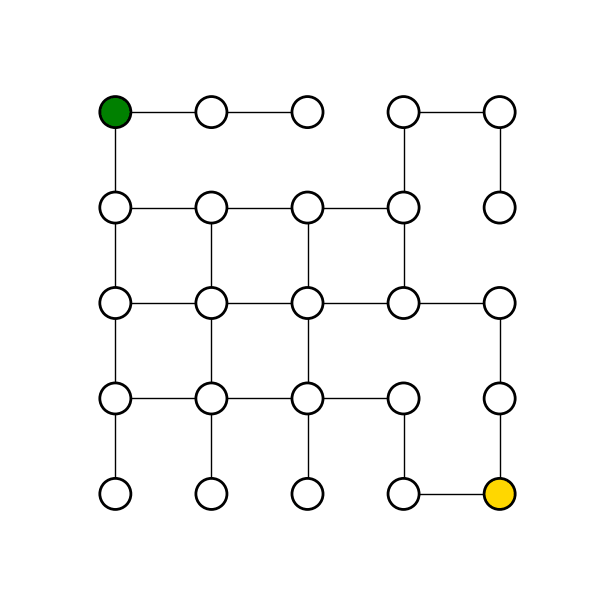

In [9]:

road = RoadGraph(size=25, remove_edges=10)
start, goal = 0, 24
agent = CarAgent(road.graph, start, goal)

fig, ax = plt.subplots(figsize=(6, 6))

def update(frame):
    ax.clear()

    if agent.current_node == agent.finish:
        ani.event_source.stop()

    if frame > 0 and agent.current_node != agent.finish:
        agent.move()

    draw_graph(agent, ax)

ani = FuncAnimation(fig, update, frames=range(0, 100), interval=1000, repeat=False)
# plt.show()

ani.save("agent_path.gif", writer="pillow", fps=2)
plt.close()
Image(filename="agent_path.gif")

![Рух агента](agent_path.gif)

<div style="text-align: right;">

  **Виконав:** Токарюк Станіслав Борисович 
   
  **Перевірив:** Трочун Євгеній Володимирович  
</div>